# 7.6 Capstone 2 Data Wrangling<a id='7_6_Capstone_2_Data_Wrangling'></a>

  * [7.6.1 Recap Of Data Science Problem](#7.6.1_Recap_Of_Data_Science_Problem)
  * [7.6.2 Imports](#7.6.2_Imports)
  * [7.6.3 Functions_Created](#7.6.3_Functions_Created)
  * [7.6.4 Load The Study Data](#7.6.4_Load_The_Study_Data)
  * [7.6.5 Clean Up Dataframe Structure](#7.6.5_Clean_Up_Dataframe_Structure)
  * [7.6.6 Add Columns to Dataframe Structure](#7.6.6_Add_Columns_to_Dataframe_Structure)
  * [7.6.7 Explore The Data](#7.6.7_Explore_The_Data)
  * [7.6.8 Save data](#7.6.8_Save_data)
  * [7.6.9 Summary](#7.6.9_Summary)


## 7.6.1 Recap Of Data Science Problem<a id='7.6.1_Recap_Of_Data_Science_Problem'></a>

Goal: Predict likelihood of early stage diabetes based on various symptoms

The dataset includes the gender, age and 14 symptoms of a newly diabetic or would-be diabetic patient and whether they tested positive or negative for diabetes.  There are 550 rows of data.  The aim is to build a model to predict whether a subject providing that data would be more likely to test positive or negative for diabetes.
(Note from the website source: The dataset was collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor).

Definitions of some symptoms:
polyuria:  production of abnormally large volumes of dilute urine.
polydipsia:  abnormally great thirst as a symptom of disease (such as diabetes) or psychological disturbance.
polyphagia:  also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.
alopecia:  alopecia areata is a condition that causes hair to fall out in small patches, which can be unnoticeable. These patches may connect, however, and then become noticeable. The condition develops when the immune system attacks the hair follicles, resulting in hair loss.
partial paresis:  paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal. Paresis occurs when nerves are damaged.

The link to the UCI Machine Learning Repository dataset is:
https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
(Note - the period is part of the link).

Related citations are:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

## 7.6.2 Imports<a id='7.6.2_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## 7.6.3 Functions Created<a id='7.6.3_Functions_Created'></a>

In [2]:
# Function that will return column which contains the percentage of each element of given col1 in corresponding 
# element of col2
def col_percentage_of(col1, col2):
    return (col1 / col2) * 100

In [3]:
# Function that will take a given dataframe df and return the string version of the column name at position of given i
def get_symptom_col_str(df, i):
    col_str_full = str(df.iloc[[i]].symptom)
    start = col_str_full.find('    ') + 4
    end = col_str_full.find('\n', start)
    return col_str_full[start:end]

In [4]:
# Function that creates a string of 0s and 1s to indicate the values in the given column list in given dataframe df
# for given row_num (number of the row in the dataframe)
def create_symptoms_as_binary_str(df, column_list, row_num):
    binary_list = df[column_list].iloc[row_num,:].apply(str).values
    return ''.join(binary_list)

## 7.6.4 Load The Study Data<a id='7.6.4_Load_The_Study_Data'></a>

In [5]:
# The CSV data file downloaded from UCI is in the raw_data directory
df_raw = pd.read_csv('../raw_data/diabetes_data_upload.csv')

In [6]:
# Get basic info about data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# Examine some data
df_raw.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## 7.6.5 Clean Up Dataframe Structure<a id='7.6.5_Clean_Up_Dataframe_Structure'></a>

In [8]:
# Get rid of spaces in column names to avoid trouble in making column references later
df = df_raw.copy()
df.columns = df.columns.str.replace(' ','_')
# Make column names uniform by setting to all lowercase
df.rename(str.lower, axis='columns', inplace=True)

In [9]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [10]:
# Since most of the data contains 'Yes'/'No' values, transform 'gender' column to 'is_male' with 'Yes'/'No' values
df.gender = df.gender.str.replace('Male','Yes')
df.gender = df.gender.str.replace('Female','No')
df.rename({'gender': 'is_male'}, axis='columns', inplace=True)

In [11]:
# Since most of the data contains 'Yes'/'No' values, transform 'column' column to 'diabetes_found' with 'Yes'/'No' values
df.rename({'class': 'diabetes_found'}, axis='columns', inplace=True)
df.diabetes_found = df.diabetes_found.str.replace('Positive','Yes')
df.diabetes_found = df.diabetes_found.str.replace('Negative','No')

In [12]:
# Make sure there are no missing values - since False returned, there are not
df.isna().any(axis=None)

False

In [13]:
df.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found
0,40,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes
1,58,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes
2,41,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes
3,45,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes
4,60,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


## 7.6.6 Add Columns to Dataframe Structure<a id='7.6.6_Add_Columns_to_Dataframe_Structure'></a>

In [14]:
# Look at stats for 'age' (the one numeric column)
df.age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: age, dtype: float64

In [15]:
# Create two new columns with age in categories, one with 4 categories, one with 10
df['age_qcut_4'] = pd.qcut(df['age'], q=4)
df['age_qcut_10'] = pd.qcut(df['age'], q=10, precision=0)
df.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10
0,40,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,"(39.0, 47.5]","(37.0, 40.0]"
1,58,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,"(57.0, 90.0]","(55.0, 58.0]"
2,41,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,"(39.0, 47.5]","(40.0, 44.0]"
3,45,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes,"(39.0, 47.5]","(44.0, 48.0]"
4,60,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"(57.0, 90.0]","(58.0, 65.0]"


In [16]:
# Create boolean version of 'Yes'/'No' valued columns using 1/0 instead of True/False to allow for summing
df_boolean = df.replace({'Yes':1, 'No':0})
df_boolean.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,"(39.0, 47.5]","(37.0, 40.0]"
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,"(57.0, 90.0]","(55.0, 58.0]"
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,"(39.0, 47.5]","(40.0, 44.0]"
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,"(39.0, 47.5]","(44.0, 48.0]"
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,"(57.0, 90.0]","(58.0, 65.0]"


In [17]:
# Make version of boolean df with only those for which diabetes was found
df_boolean_diabetes_not_found = df_boolean[df_boolean['diabetes_found'] == 0]
# Make version of boolean df with only those for which diabetes was found
df_boolean_diabetes_found = df_boolean[df_boolean['diabetes_found'] == 1]

In [18]:
# Find out how many there are of each qcut_4 age group among subjects with diabetes_found
diabetes_found_totals_age_qcut_4 = df_boolean_diabetes_found['age_qcut_4'].value_counts()
print(diabetes_found_totals_age_qcut_4)

(47.5, 57.0]      103
(15.999, 39.0]     85
(57.0, 90.0]       78
(39.0, 47.5]       54
Name: age_qcut_4, dtype: int64


In [19]:
# Find out how many there are of each qcut_4 age group among all subjects
all_totals_age_qcut_4 = df_boolean['age_qcut_4'].value_counts()
print(all_totals_age_qcut_4)

(15.999, 39.0]    144
(47.5, 57.0]      143
(57.0, 90.0]      117
(39.0, 47.5]      116
Name: age_qcut_4, dtype: int64


In [20]:
# Make dataframe that compares how many subjects with diabetes and how many subjects total for each age group
df_age_qcut_4_vs_all = pd.DataFrame({'diabetes_found': diabetes_found_totals_age_qcut_4, 'all': all_totals_age_qcut_4})
print(df_age_qcut_4_vs_all)

                diabetes_found  all
(15.999, 39.0]              85  144
(39.0, 47.5]                54  116
(47.5, 57.0]               103  143
(57.0, 90.0]                78  117


In [21]:
# Create column that contains what percentage of diabetes_found subjects is in all subjects for four age groups
df_age_qcut_4_vs_all['percentage_diabetes_found'] = col_percentage_of(df_age_qcut_4_vs_all['diabetes_found'], df_age_qcut_4_vs_all['all'])
print(df_age_qcut_4_vs_all)

                diabetes_found  all  percentage_diabetes_found
(15.999, 39.0]              85  144                  59.027778
(39.0, 47.5]                54  116                  46.551724
(47.5, 57.0]               103  143                  72.027972
(57.0, 90.0]                78  117                  66.666667


In [22]:
# Since 72% between ages 47.5 and 57 and 67% between ages 57 and 90 had diabetes_found, am going to create another
# boolean column called age_over_47_point_5
df_boolean['age_over_47_point_5'] = np.where(df_boolean['age'] >= 47.5, 1, 0)
df_boolean_diabetes_not_found['age_over_47_point_5'] = np.where(df_boolean_diabetes_not_found['age'] >= 47.5, 1, 0)
df_boolean_diabetes_found['age_over_47_point_5'] = np.where(df_boolean_diabetes_found['age'] >= 47.5, 1, 0)
df_boolean.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10,age_over_47_point_5
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,"(39.0, 47.5]","(37.0, 40.0]",0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,"(57.0, 90.0]","(55.0, 58.0]",1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,"(39.0, 47.5]","(40.0, 44.0]",0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,"(39.0, 47.5]","(44.0, 48.0]",0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,"(57.0, 90.0]","(58.0, 65.0]",1


In [23]:
# Create a column list of all the columns in df_boolean (eventually will be only the boolean columns)
column_list_boolean = list(df_boolean.columns) #column_list_boolean = list(df_boolean) also works
print(column_list_boolean)

['age', 'is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'diabetes_found', 'age_qcut_4', 'age_qcut_10', 'age_over_47_point_5']


In [24]:
# Remove columns that are not boolean
column_list_boolean.remove('age')
column_list_boolean.remove('age_qcut_4')
column_list_boolean.remove('age_qcut_10')
print(column_list_boolean)
# ['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 
# 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 
# 'obesity', 'diabetes_found', 'age_over_47_point_5']

['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'diabetes_found', 'age_over_47_point_5']


In [25]:
# Create a column list of all the columns that are not boolean
column_list_non_boolean_age = ['age', 'age_qcut_4', 'age_qcut_10']

In [26]:
# Use the boolean version of the df to creating a column containing the number of symptoms for the row
df['num_symptoms_incl_boolean_age'] = df_boolean[column_list_boolean].sum(axis=1)
df.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10,num_symptoms_incl_boolean_age
0,40,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,"(39.0, 47.5]","(37.0, 40.0]",9
1,58,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,"(57.0, 90.0]","(55.0, 58.0]",7
2,41,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Yes,"(39.0, 47.5]","(40.0, 44.0]",9
3,45,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes,"(39.0, 47.5]","(44.0, 48.0]",8
4,60,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"(57.0, 90.0]","(58.0, 65.0]",16


In [27]:
# Make a list of totals for each symptom column and make dataframe version of it
diabetes_found_totals = df_boolean_diabetes_found[column_list_boolean].sum(axis=0)
df_diabetes_found_totals = pd.DataFrame(diabetes_found_totals).reset_index()
df_diabetes_found_totals.columns = ['symptom', 'total']
# Sort descending to find out which symptoms most prevalent in those with diabetes
diabetes_found_totals_sorted = df_diabetes_found_totals.sort_values(by='total', ascending=False)
# Turn list into dataframe and give numeric index
df_diabetes_found_totals_sorted = pd.DataFrame(diabetes_found_totals_sorted).reset_index()
# Give column headings to columns in dataframe
df_diabetes_found_totals_sorted.columns = ['orig_index', 'symptom', 'total']
print(df_diabetes_found_totals_sorted)

    orig_index              symptom  total
0           15       diabetes_found    320
1            1             polyuria    243
2            2           polydipsia    225
3            4             weakness    218
4           11      partial_paresis    192
5            5           polyphagia    189
6            3   sudden_weight_loss    188
7           16  age_over_47_point_5    181
8            7      visual_blurring    175
9            8              itching    154
10          10      delayed_healing    153
11           0              is_male    147
12          12     muscle_stiffness    135
13           9         irritability    110
14           6       genital_thrush     83
15          13             alopecia     78
16          14              obesity     61


In [28]:
# Create a list of symptoms in order of how much they appear in those rows where diabetes_found
symptom_importance_list = df_diabetes_found_totals_sorted['symptom'].to_list()
print(symptom_importance_list)

['diabetes_found', 'polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', 'age_over_47_point_5', 'visual_blurring', 'itching', 'delayed_healing', 'is_male', 'muscle_stiffness', 'irritability', 'genital_thrush', 'alopecia', 'obesity']


In [29]:
# Test function get_symptom_col_str
get_symptom_col_str(df_diabetes_found_totals_sorted, 1) 

'polyuria'

In [30]:
# Create column symptom_str using function get_symptom_col_str for each symptom
# Really did not use this column, but thought would at one time to distinguish from symptom column (object, not string)
df_diabetes_found_totals_sorted['symptom_str'] = [get_symptom_col_str(df_diabetes_found_totals_sorted, i) for i in range(17)]

In [31]:
# Add column showing importance of symptom in predicting diabetes based on its count among those rows with diabetes_found
df_diabetes_found_totals_sorted['symptom_importance'] = df_diabetes_found_totals_sorted.index
# Drop irrelevant first row
df_diabetes_found_totals_sorted.drop(0, inplace=True)
# Drop irrelevant orig_index column
df_diabetes_found_totals_sorted.drop(columns='orig_index', inplace=True)
df_diabetes_found_totals_sorted.head(20)

,symptom,total,symptom_str,symptom_importance
1,polyuria,243,polyuria,1
2,polydipsia,225,polydipsia,2
3,weakness,218,weakness,3
4,partial_paresis,192,partial_paresis,4
5,polyphagia,189,polyphagia,5
6,sudden_weight_loss,188,sudden_weight_loss,6
7,age_over_47_point_5,181,age_over_47_point_5,7
8,visual_blurring,175,visual_blurring,8
9,itching,154,itching,9
10,delayed_healing,153,delayed_healing,10


## 7.6.7 Explore The Data<a id='7.6.7_Explore_The_Data'></a>

In [32]:
# Column list of booleans in original order
print(column_list_boolean)
# ['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 
# 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 
# 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'diabetes_found', 'age_over_47_point_5']

['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'diabetes_found', 'age_over_47_point_5']


In [33]:
# Column list of boolean symptoms in importance (prevalence in those with diabetes_found) order 
# (column diabetes_found removed)
column_list_boolean_sorted = list(df_diabetes_found_totals_sorted.symptom)
print(column_list_boolean_sorted)
# ['polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', , 'age_over_47_point_5',
# 'visual_blurring', 'itching', 'delayed_healing', 'is_male', 
# 'muscle_stiffness', 'irritability', 'genital_thrush', 'alopecia', 'obesity']

['polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', 'age_over_47_point_5', 'visual_blurring', 'itching', 'delayed_healing', 'is_male', 'muscle_stiffness', 'irritability', 'genital_thrush', 'alopecia', 'obesity']


In [34]:
# Test function create_symptoms_as_binary_str on row 0 of df_boolean_diabetes_found, columns in original table order
print(create_symptoms_as_binary_str(df_boolean_diabetes_found, column_list_boolean, 0))
# 10101000101011110

10101000101011110


In [35]:
# Test function create_symptoms_as_binary_str on row 0 of df_boolean, columns in prevalence order
print(create_symptoms_as_binary_str(df_boolean, column_list_boolean_sorted, 0))
# 0110000011110011

0110000011110011


In [36]:
# List binary string of symptoms in order of importance for all rows with diabetes_found
symptoms_sorted_as_binary_list_diabetes_found = [create_symptoms_as_binary_str(df_boolean_diabetes_found, column_list_boolean_sorted, i) for i in range(len(df_boolean_diabetes_found))]
print(symptoms_sorted_as_binary_list_diabetes_found)

['0110000011110011', '0011001100100010', '1010100011110010', '0010110011100100', '1111111111111011', '1110101111110011', '1111101001100100', '1111011110111000', '1111101010111101', '0110111110101010', '1110000001111110', '1100100011110100', '1000100001101110', '1110111110100111', '1111101111100000', '1111101001110000', '1110011001110100', '0111101101111011', '1111101100110000', '1110010000100100', '1111101100111000', '1110111111110110', '1000010010101110', '0110011111101000', '1111111101110001', '0000000001101101', '0010100000111000', '1111111111110000', '0100000000100110', '1111111100101010', '1111111100100000', '1110110110101101', '0010000001100010', '1111011111111000', '1110001110100000', '1110001110100100', '1001001100100010', '1110111100110011', '1001010000100010', '1010110001000000', '0100111111011100', '1101111001000000', '0111101111011000', '1111110011010000', '1111010110010000', '0011011111000000', '1111111111010001', '1111111110010000', '1110110111010001', '1011010101010000',

In [37]:
# Get substrings of various lengths to see how prevalent are combinations of the most important symptoms
substr_binary_list_7 = [x[0:7] for x in symptoms_sorted_as_binary_list_diabetes_found]
substr_binary_list_3 = [x[0:3] for x in symptoms_sorted_as_binary_list_diabetes_found]
substr_binary_list_2 = [x[0:2] for x in symptoms_sorted_as_binary_list_diabetes_found]

In [38]:
# Set up dataframe of each of the substring lists
df_substr_binary_list_diabetes_found = pd.DataFrame(symptoms_sorted_as_binary_list_diabetes_found)
df_substr_binary_list_diabetes_found_7 = pd.DataFrame(substr_binary_list_7)
df_substr_binary_list_diabetes_found_3 = pd.DataFrame(substr_binary_list_3)
df_substr_binary_list_diabetes_found_2 = pd.DataFrame(substr_binary_list_2)
# List of counts of substrings with 7 most important symptoms - visually, first 4 stand out as being prevalent together
df_substr_binary_list_diabetes_found_7.value_counts()

1111111    38
1111110    27
1111101    18
1111011    16
1101111    10
           ..
1011010     1
1000011     1
1010101     1
1010100     1
1001100     1
Length: 77, dtype: int64

In [39]:
df_substr_binary_list_diabetes_found_3.value_counts()

111    155
110     38
100     27
000     25
101     23
011     20
001     20
010     12
dtype: int64

In [40]:
df_substr_binary_list_diabetes_found_2.value_counts()

11    193
10     50
00     45
01     32
dtype: int64

In [41]:
# Results:
# 113 of 320 (35%) had all of the top four symptoms: 'polyuria', 'polydipsia', 'weakness', 'partial_paresis'
# 155 of 320 (48%) had all of the top three symptoms: 'polyuria', 'polydipsia', 'weakness'
# 193 of 320 (60%) had both of the top two symptoms: 'polyuria', 'polydipsia'

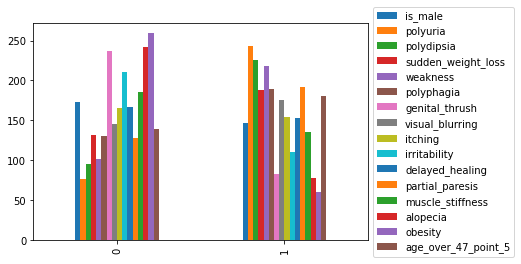

In [42]:
# Graph of prevalence of various symptoms
# Total of 320 with diabetes_found, 1 if has symptom, 0 if does not
df_boolean_only_diabetes_found = df_boolean_diabetes_found.drop(columns=['age', 'age_qcut_4', 'age_qcut_10', 'diabetes_found'])
df_boolean_only_diabetes_found_totals = df_boolean_only_diabetes_found.apply(pd.value_counts)
df_boolean_only_diabetes_found_totals.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

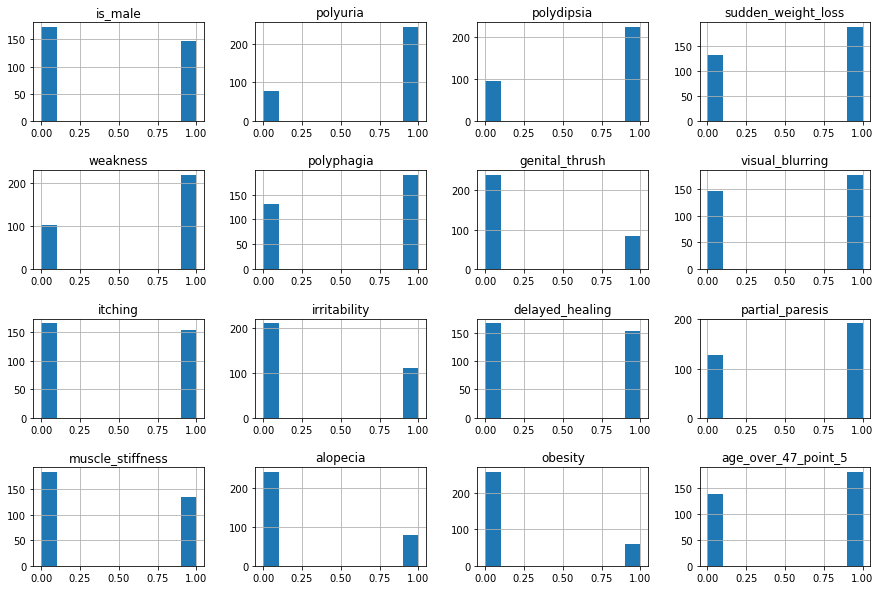

In [43]:
# Histogram of symptoms in subjects with diabetes_found
df_boolean_only_diabetes_found.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## 7.6.8 Save data<a id='7.6.8_Save_data'></a>

In [44]:
# Save various dataframes created in this notebook as csv files in /data subdirectory
datapath = '../data'

In [ ]:
# Get rid of spaces in column names to avoid trouble in making column references later
# Make column names uniform by setting to all lowercase
save_file(df, 'df.csv', datapath)

A file already exists with this name.



In [ ]:
# Create boolean version of 'Yes'/'No' valued columns using 1/0 instead of True/False to allow for summing
save_file(df_boolean, 'df_boolean.csv', datapath)

In [ ]:
# Version of df_boolean with only those with diabetes_found = 0
save_file(df_boolean_diabetes_not_found, 'df_boolean_diabetes_not_found.csv', datapath)

In [ ]:
# Version of df_boolean with only those with diabetes_found = 1 and additional age fields added, including boolean
save_file(df_boolean_diabetes_found, 'df_boolean_diabetes_found.csv', datapath)

In [ ]:
# Total for each symptom for those with diabetes_found
save_file(df_diabetes_found_totals, 'df_diabetes_found_totals.csv', datapath)

In [ ]:
# Total for each symptom for those with diabetes_found, sorted descending based on total
# With additional fields symptom_importance and symptom_str
save_file(df_diabetes_found_totals_sorted, 'df_diabetes_found_totals_sorted.csv', datapath)

In [ ]:
# Binary version of symptoms sorted by importance for each subject with diabetes_found
save_file(df_substr_binary_list_diabetes_found, 'df_substr_binary_list_diabetes_found.csv', datapath)

In [ ]:
# Binary version of first 7 symptoms sorted by importance for each subject with diabetes_found
save_file(df_substr_binary_list_diabetes_found_7, 'df_substr_binary_list_diabetes_found_7.csv', datapath)

In [ ]:
# Binary version of first 3 symptoms sorted by importance for each subject with diabetes_found
save_file(df_substr_binary_list_diabetes_found_3, 'df_substr_binary_list_diabetes_found_3.csv', datapath)

In [ ]:
# Binary version of first 2 symptoms sorted by importance for each subject with diabetes_found
save_file(df_substr_binary_list_diabetes_found_2, 'df_substr_binary_list_diabetes_found_2.csv', datapath)

In [ ]:
# Version of df_boolean_diabetes_found with all non-boolean fields removed
save_file(df_boolean_only_diabetes_found, 'df_boolean_only_diabetes_found.csv', datapath)

## 7.6.9 Summary<a id='7.6.9_Summary'></a>

The given data had no missing values and was almost all boolean.  Only age was not.  Two different kinds of categorical age columns was made from the age column, as well as a binary version based on a range, based on two categories of the four category version that had a relatively high percentage of subjects in those age groups having diabetes_found.

The symptoms that seem to be most important separately and together are: 'polyuria', 'polydipsia', 'weakness', and 'partial_paresis'.  That will be kept in mind although, since there are only 16 symptoms all together, they will probably all be looked at.  Categorical-based algorithms will be explored because of the nature of the data.